BibTeX:
@inproceedings{misra2018decomposing,
  title={Decomposing fit semantics for product size recommendation in metric spaces},
  author={Misra, Rishabh and Wan, Mengting and McAuley, Julian},
  booktitle={Proceedings of the 12th ACM Conference on Recommender Systems},
  pages={422--426},
  year={2018},
  organization={ACM}
}

@book{book,
author = {Misra, Rishabh and Grover, Jigyasa},
year = {2021},
month = {01},
pages = {},
title = {Sculpting Data for ML: The first act of Machine Learning},
isbn = {978-0-578-83125-1}
}

rishabhmisra.github.io/publications 


Where I retrieved the data?
https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation/home

In [197]:
#imports for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [198]:
#read json dataset
clothes_df = pd.read_json('renttherunway_final_data.json', lines=True)

In [199]:
#remove any unwanted variables
clothes_df.drop(columns=['review_date', 'item_id', 'user_id', 'review_text', 'review_summary', 'rented for'], axis=1, inplace=True)
clothes_df = clothes_df[(clothes_df['category'] == 'dress')]
clothes_df.drop(columns='category', axis=1, inplace=True)

In [200]:
clothes_df.reset_index().head()

,index,fit,bust size,weight,rating,body type,height,size,age
0,3,fit,34c,135lbs,8.0,pear,"5' 5""",8,34.0
1,5,fit,32b,138lbs,8.0,athletic,"5' 8""",8,45.0
2,6,fit,34c,112lbs,10.0,hourglass,"5' 3""",4,27.0
3,7,fit,34d+,118lbs,10.0,full bust,"5' 3""",8,65.0
4,10,small,34b,135lbs,8.0,athletic,"5' 3""",12,33.0


In [201]:
#analyzing 'fit' (target) variable
clothes_df['fit'].value_counts()

fit      66567
small    13686
large    12631
Name: fit, dtype: int64

In [202]:
#making my target variable into a binary class
clothes_df['fitting'] = clothes_df['fit'].replace({'fit': 'fit', 'small': 'not fit', 'large': 'not fit'})
clothes_df.drop(columns='fit', axis=1, inplace=True)

In [203]:
clothes_df['fitting'].value_counts()

fit        66567
not fit    26317
Name: fitting, dtype: int64

In [204]:
#checking for null values
print('Missing values for each variable \n')
for i in clothes_df.columns:
    missing = clothes_df[i].isnull().sum()*100/clothes_df[i].isnull().count()
    print(f'{i}: {missing}%')

Missing values for each variable 

bust size: 9.570001291934025%
weight: 15.652857327419147%
rating: 0.036604797381680376%
body type: 7.668705051462038%
height: 0.3369794582489988%
size: 0.0%
age: 0.4284914517031997%
fitting: 0.0%


In [205]:
#unique values for each variable
for i in clothes_df.columns:
    print(i)
    print(clothes_df[i].unique())
    print('\n')

bust size
['34c' '32b' '34d+' '34b' '36d' '34d' '32d+' '32c' '32dd' '32d' '36b'
 '36c' '32a' nan '34ddd/e' '38d+' '36a' '38d' '34a' '38dd' '36ddd/e'
 '42dd' '36dd' '28f' '38c' '36d+' '34dd' '40d' '38a' '32ddd/e' '42d'
 '34aa' '32aa' '38b' '28c' '36f' '34g' '32f' '40c' '30d' '28g' '30dd'
 '36g' '38f' '30a' '30ddd/e' '44dd' '30g' '38h' '34j' '34f' '38ddd/e'
 '32g' '40ddd/e' '32h' '30c' '44d' '38g' '40g' '28b' '34h' '28a' '30b'
 '40f' '28dd' '36h' '28ddd/e' '30f' '40dd' '44ddd/e' '30i' '32j' '36j'
 '40h' '40b' '36aa' '48d' '38i' '30h' '32i' '42ddd/e' '42c' '28aa' '28d'
 '36i' '42b' '46ddd/e' '44c' '42f' '38aa' '44f' '30aa' '46f' '42g' '34i'
 '44b' '44g' '48dd' '46c' '40i']


weight
['135lbs' '138lbs' '112lbs' '118lbs' '142lbs' '170lbs' '143lbs' '115lbs'
 '145lbs' '140lbs' '120lbs' nan '130lbs' '155lbs' '150lbs' '136lbs'
 '174lbs' '125lbs' '110lbs' '128lbs' '160lbs' '250lbs' '231lbs' '175lbs'
 '126lbs' '210lbs' '165lbs' '215lbs' '180lbs' '163lbs' '106lbs' '178lbs'
 '108lbs' '92lbs' '132lbs

In [206]:
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135lbs,8.0,pear,"5' 5""",8,34.0,fit
5,32b,138lbs,8.0,athletic,"5' 8""",8,45.0,fit
6,34c,112lbs,10.0,hourglass,"5' 3""",4,27.0,fit
7,34d+,118lbs,10.0,full bust,"5' 3""",8,65.0,fit
10,34b,135lbs,8.0,athletic,"5' 3""",12,33.0,not fit


In [207]:
# categorical variables value counts 
for i in clothes_df.select_dtypes(include=['O']):
    print(i)
    print(clothes_df[i].value_counts())
    print('\n')

bust size
34b        12968
34c        11230
34d         8843
36c         6513
36d         5481
           ...  
46c            1
46ddd/e        1
46f            1
40i            1
44g            1
Name: bust size, Length: 99, dtype: int64


weight
130lbs    6855
135lbs    6541
125lbs    6308
140lbs    6036
120lbs    5078
          ... 
264lbs       1
88lbs        1
247lbs       1
241lbs       1
91lbs        1
Name: weight, Length: 173, dtype: int64


body type
hourglass            26714
athletic             20606
pear                 11059
petite               10939
full bust             7348
straight & narrow     6678
apple                 2417
Name: body type, dtype: int64


height
5' 4"     13591
5' 6"     12164
5' 5"     11803
5' 7"     11310
5' 3"     10333
5' 2"      8447
5' 8"      7647
5' 9"      5329
5' 1"      3693
5' 10"     3126
5' 0"      2038
5' 11"     1451
6' 0"       642
4' 11"      544
6' 1"       191
4' 10"      114
6' 2"        61
4' 9"        39
6' 3"        14
4' 

### Removing 'lbs' and converting the 'weight' variable into numeric

In [208]:
#convert height to inches
#remove lbs from weight
clothes_df['weight'] = clothes_df['weight'].astype(str).apply(lambda x: x.replace('nan', '0lbs').split('l')[0]).astype(int)
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135,8.0,pear,"5' 5""",8,34.0,fit
5,32b,138,8.0,athletic,"5' 8""",8,45.0,fit
6,34c,112,10.0,hourglass,"5' 3""",4,27.0,fit
7,34d+,118,10.0,full bust,"5' 3""",8,65.0,fit
10,34b,135,8.0,athletic,"5' 3""",12,33.0,not fit


In [209]:
#clothes_df['weight'].apply(lambda x: x.split('l'))

In [210]:
# Dropping null values
clothes_df['weight'].replace(0, round(clothes_df['weight'].mean()), inplace=True)

In [211]:
 clothes_df.dropna(inplace=True)

In [212]:
#nan values in:
#'age', 'height', 'rented for', 'rating', 'bust size'

for i in clothes_df[['age', 'height', 'rating', 'bust size']]:
    clothes_df = clothes_df.drop(clothes_df[clothes_df[i] == 'nan'].index)

### Converting the 'height' variable into centimeters for better usability

In [213]:
clothes_df['height'] = clothes_df['height'].apply(lambda x: x.replace('\"','').split('\''))
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting
3,34c,135,8.0,pear,"[5, 5]",8,34.0,fit
5,32b,138,8.0,athletic,"[5, 8]",8,45.0,fit
6,34c,112,10.0,hourglass,"[5, 3]",4,27.0,fit
7,34d+,118,10.0,full bust,"[5, 3]",8,65.0,fit
10,34b,135,8.0,athletic,"[5, 3]",12,33.0,not fit


In [214]:
clothes_df['feet'] = clothes_df['height'].apply(lambda x: float(x[0]) * 30.48)
clothes_df['inches'] = clothes_df['height'].apply(lambda x: float(x[1]) * 2.54)

In [215]:
clothes_df.head()

,bust size,weight,rating,body type,height,size,age,fitting,feet,inches
3,34c,135,8.0,pear,"[5, 5]",8,34.0,fit,152.4,12.70
5,32b,138,8.0,athletic,"[5, 8]",8,45.0,fit,152.4,20.32
6,34c,112,10.0,hourglass,"[5, 3]",4,27.0,fit,152.4,7.62
7,34d+,118,10.0,full bust,"[5, 3]",8,65.0,fit,152.4,7.62
10,34b,135,8.0,athletic,"[5, 3]",12,33.0,not fit,152.4,7.62


In [216]:
clothes_df['height_cm'] = clothes_df['feet'] + clothes_df['inches']
clothes_df.drop(columns=['height', 'feet', 'inches'], axis=1, inplace=True)

In [217]:

clothes_df['age'] = clothes_df['age'].astype(int)
clothes_df.head()

,bust size,weight,rating,body type,size,age,fitting,height_cm
3,34c,135,8.0,pear,8,34,fit,165.10
5,32b,138,8.0,athletic,8,45,fit,172.72
6,34c,112,10.0,hourglass,4,27,fit,160.02
7,34d+,118,10.0,full bust,8,65,fit,160.02
10,34b,135,8.0,athletic,12,33,not fit,160.02


In [218]:
clothes_df['fitting'].value_counts()

fit        56901
not fit    22576
Name: fitting, dtype: int64

In [219]:
clothes_df.shape

(79477, 8)


## EDA

In [220]:
clothes_df['age'] = clothes_df['age'].replace(0, np.nan)
clothes_df['age'].fillna(clothes_df['age'].mean(), inplace=True)
clothes_df['age'] = clothes_df['age'].astype(int)

clothes_df['age'].unique()

array([ 34,  45,  27,  65,  33,  30,  29,  35,  26,  28,  21,  20,  32,
        53,  31,  38,  36,  37,  24,  25,  48,  40,  23,  44,  17,  43,
        50,  39,  42,  41,  56,  52,  54,  59,  46,  47,  55,  49,  57,
        22,  60,  19,  58,  15,  62,  51,  70,  16,  69,  66,  18,  64,
        63,  87,  68,  61, 117, 116,  67,   2,  91,  92, 106,  75,  72,
        14,   1,  71,  74,  76,  73,   3])

### Univariate Analysis

In [221]:
clothes_df.describe()

,weight,rating,size,age,height_cm
count,79477.000000,79477.000000,79477.000000,79477.000000,79477.000000
mean,134.808737,9.038112,12.007335,33.907206,165.628633
std,21.225765,1.453498,8.042988,7.725137,6.784576
min,50.000000,2.000000,0.000000,1.000000,137.160000
25%,118.000000,8.000000,8.000000,29.000000,160.020000
50%,130.000000,10.000000,12.000000,32.000000,165.100000
75%,145.000000,10.000000,16.000000,37.000000,170.180000
max,285.000000,10.000000,57.000000,117.000000,193.040000


In [222]:
clothes_df['size'] = np.log(clothes_df['size'].replace(0, np.nan))
clothes_df['size'].replace(np.nan, 0, inplace=True)

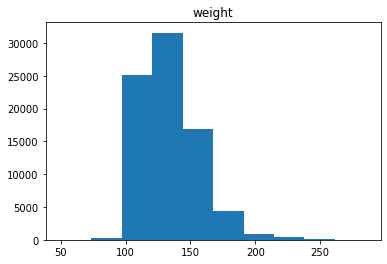

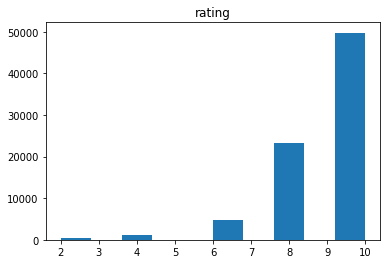

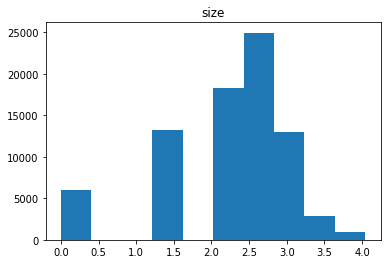

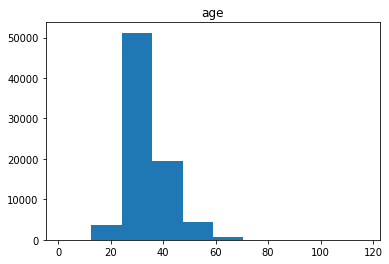

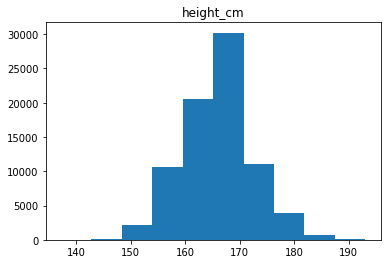

In [223]:
# visualizing the continuous variables through histograms
for i in clothes_df.select_dtypes(include='number'):
    plt.hist(clothes_df[i])
    plt.title(i)
    plt.show()

In [224]:
np.where(clothes_df['size'] == 0)

(array([   12,    17,    46, ..., 79449, 79456, 79460]),)

Text(0.5, 1.0, 'horizontal bar chart of fit')

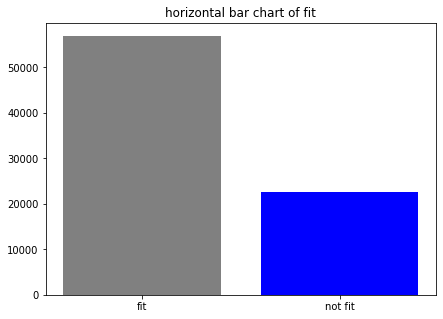

In [225]:
plt.figure(figsize=(7,5))
plt.bar(clothes_df.groupby("fitting")["fitting"].count().index, 
         clothes_df.groupby("fitting")["fitting"].count(), 
         color=["gray","blue"])
plt.title("horizontal bar chart of fit")

### Bivariate Analysis

##### Continuous/Continuous

In [226]:
clothes_df.corr()

,weight,rating,size,age,height_cm
weight,1.000000,-0.015818,0.591490,0.043702,0.337471
rating,-0.015818,1.000000,-0.032322,-0.030601,0.003042
size,0.591490,-0.032322,1.000000,0.130274,0.262982
age,0.043702,-0.030601,0.130274,1.000000,-0.018413
height_cm,0.337471,0.003042,0.262982,-0.018413,1.000000


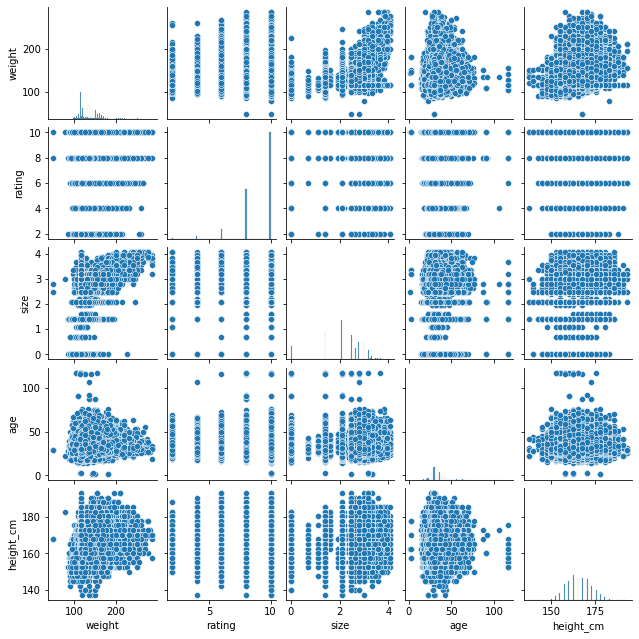

In [227]:
sns.pairplot(data=clothes_df, height=1.8)

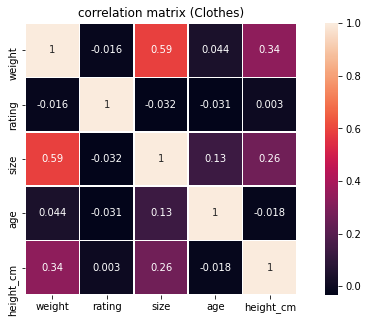

In [228]:
plt.figure(figsize=(10,5))

#plt.subplot(1,2,1)
sns.heatmap(clothes_df.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Clothes)")
plt.show()

size and weight (0.657)

weight and height_cm (0.339)

size and height_cm (0.236)

size and age (0.153)

#### Categorical/Continuous

In [229]:
clothes_df.groupby('fitting').mean()

,weight,rating,size,age,height_cm
fitting,,,,,
fit,134.754609,9.258431,2.193414,33.972426,165.679146
not fit,134.945163,8.482814,2.222162,33.742824,165.501319


Since fit v not fit are similar, on average, in all the continuous variables. As you can see below with an graph example of one continuous variable with the target variable

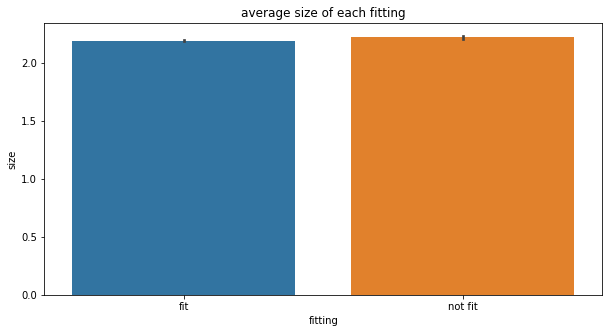

In [230]:
plt.figure(figsize=(10,5))

#plt.subplot(1,3,1)
sns.barplot(x=clothes_df["fitting"], y=clothes_df["size"], data=clothes_df)
plt.title("average size of each fitting")
plt.show()

#### Categorical/Categorical

In [231]:
# feature engineering 'bust size' --> 'bust_line' and 'cup_size'
clothes_df['bust_line'] = clothes_df['bust size'].apply(lambda x: x[:2])
clothes_df['cup_size'] = clothes_df['bust size'].apply(lambda x: x[2:])
clothes_df.head()

,bust size,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,34c,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,32b,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,34c,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,34d+,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,34b,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [232]:
# Removing repetitive or odd values
count_table = pd.crosstab(clothes_df["fitting"], clothes_df["cup_size"])
clothes_df['cup_size'] = clothes_df['cup_size'].replace(['i', 'j'], 'h')
clothes_df['cup_size'] = clothes_df['cup_size'].replace('ddd/e', 'e')

In [233]:
# importing stat libraries
from scipy.stats import stats
from scipy.stats import chisquare
import statsmodels.api as sm
from scipy.stats import chisquare

In [234]:
# checking whether categorical variables have a relationship with the target variable
count_table = pd.crosstab(clothes_df["fitting"], clothes_df["body type"])
count_table

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
fitting,,,,,,,
fit,1598,13849,4627,17790,7262,7307,4468
not fit,636,5403,1946,6954,3018,2890,1729


In [235]:
 print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=54490.7509468148, pvalue=0.0)


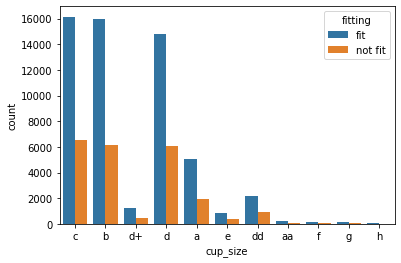

In [236]:
sns.countplot(x="cup_size", hue="fitting", data=clothes_df)
plt.show()

In [237]:
count_table2 = pd.crosstab(clothes_df["fitting"], clothes_df["cup_size"])
count_table

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
fitting,,,,,,,
fit,1598,13849,4627,17790,7262,7307,4468
not fit,636,5403,1946,6954,3018,2890,1729


In [238]:
print(stats.chisquare(count_table2, axis=None))

Power_divergenceResult(statistic=167297.7573511834, pvalue=0.0)


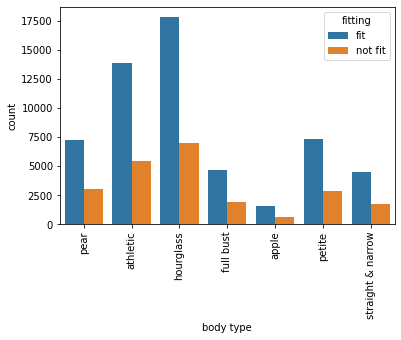

In [239]:
sns.countplot(x="body type", hue="fitting", data=clothes_df)
plt.xticks(rotation=90)
plt.show()

In [240]:
print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=54490.7509468148, pvalue=0.0)


In [241]:
clothes_df.drop(columns='bust size', axis=1, inplace=True)
clothes_df.head()

,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [242]:
clothes_df.describe(include=['O'])

,body type,fitting,bust_line,cup_size
count,79477,79477,79477,79477
unique,7,2,11,11
top,hourglass,fit,34,c
freq,24744,56901,37537,22651


# Model Prep

In [243]:
#filter method: feature selection
clothes_df.corr()

,weight,rating,size,age,height_cm
weight,1.000000,-0.015818,0.591490,0.043702,0.337471
rating,-0.015818,1.000000,-0.032322,-0.030601,0.003042
size,0.591490,-0.032322,1.000000,0.130274,0.262982
age,0.043702,-0.030601,0.130274,1.000000,-0.018413
height_cm,0.337471,0.003042,0.262982,-0.018413,1.000000


In [244]:
clothes_df.shape

(79477, 9)

In [245]:
'''clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 1)
clothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 0)
'''


"clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 1)\nclothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 0)\n"

In [246]:
clothes_df.head()

,weight,rating,body type,size,age,fitting,height_cm,bust_line,cup_size
3,135,8.0,pear,2.079442,34,fit,165.10,34,c
5,138,8.0,athletic,2.079442,45,fit,172.72,32,b
6,112,10.0,hourglass,1.386294,27,fit,160.02,34,c
7,118,10.0,full bust,2.079442,65,fit,160.02,34,d+
10,135,8.0,athletic,2.484907,33,not fit,160.02,34,b


In [247]:
clothes_df = pd.concat([clothes_df, pd.get_dummies(clothes_df[["body type", "cup_size", "bust_line"]])], axis=1)
clothes_df.drop(columns=['body type', 'cup_size', 'bust_line'], axis=1, inplace=True)

In [248]:
def remove_correlated_features(dataset, threshold=0.70):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

clothes_df = remove_correlated_features(clothes_df)

# Models

In [249]:
clothes_df.head()

,weight,rating,size,age,fitting,height_cm,body type_apple,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow,cup_size_a,cup_size_aa,cup_size_b,cup_size_c,cup_size_d,cup_size_d+,cup_size_dd,cup_size_e,cup_size_f,cup_size_g,cup_size_h,bust_line_28,bust_line_30,bust_line_32,bust_line_34,bust_line_36,bust_line_38,bust_line_40,bust_line_42,bust_line_44,bust_line_46,bust_line_48
3,135,8.0,2.079442,34,fit,165.10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,138,8.0,2.079442,45,fit,172.72,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,112,10.0,1.386294,27,fit,160.02,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,118,10.0,2.079442,65,fit,160.02,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,135,8.0,2.484907,33,not fit,160.02,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [250]:
clothes_df['fitting'] = clothes_df['fitting'].replace('fit', 0)
clothes_df['fitting'] = clothes_df['fitting'].replace('not fit', 1)

In [251]:
clothes_df = clothes_df[['age', 'weight', 'height_cm', 'rating', 'size', 'fitting']]
clothes_df['size'] = round(clothes_df['size']).astype(int)
clothes_df.head()

,age,weight,height_cm,rating,size,fitting
3,34,135,165.10,8.0,2,0
5,45,138,172.72,8.0,2,0
6,27,112,160.02,10.0,1,0
7,65,118,160.02,10.0,2,0
10,33,135,160.02,8.0,2,1


In [252]:
from sklearn.model_selection import train_test_split 

X = clothes_df.drop(columns='fitting', axis=1)
y = clothes_df['fitting']
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (63581, 5)
Number transactions y_train dataset:  (63581,)
Number transactions X_test dataset:  (15896, 5)
Number transactions y_test dataset:  (15896,)


In [253]:
# Checking whether my model is better
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.71527428283845

### Without SMOTE

In [254]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
# logistic regression object 
lr = LogisticRegression(solver='lbfgs', penalty='l2', C=1, max_iter=500) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(f"\nTrain Score: {lr.score(X_train, y_train)}")
print(f"Test Score: {lr.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       0.74      0.95      0.83     11370
           1       0.57      0.15      0.24      4526

    accuracy                           0.73     15896
   macro avg       0.65      0.55      0.54     15896
weighted avg       0.69      0.73      0.66     15896


Train Score: 0.7268838174926472
Test Score: 0.7259058882737796


## With SMOTE

In [255]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 18050
Before OverSampling, counts of label '0': 45531 

After OverSampling, the shape of train_X: (91062, 5)
After OverSampling, the shape of train_y: (91062,) 

After OverSampling, counts of label '1': 45531
After OverSampling, counts of label '0': 45531


In [256]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
# logistic regression object 
lr1 = LogisticRegression(solver='lbfgs', penalty='l2', C=1, max_iter=500) 
  
# train the model on train set 
lr1.fit(X_train_res, y_train_res.ravel()) 
  
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))
print(f"\nTrain Score: {lr1.score(X_train_res, y_train_res.ravel())}")
print(f"Test Score: {lr1.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       0.79      0.68      0.73     11370
           1       0.40      0.54      0.46      4526

    accuracy                           0.64     15896
   macro avg       0.60      0.61      0.60     15896
weighted avg       0.68      0.64      0.65     15896


Train Score: 0.6094858448090312
Test Score: 0.642174131857071


## NearMiss

In [257]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 18050
Before Undersampling, counts of label '0': 45531 

After Undersampling, the shape of train_X: (36100, 5)
After Undersampling, the shape of train_y: (36100,) 

After Undersampling, counts of label '1': 18050
After Undersampling, counts of label '0': 18050


In [258]:
# train the model on train set 
lr2 = LogisticRegression(solver='lbfgs', penalty='l2', C=1, max_iter=500) 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

print(f"\nTrain Score: {lr2.score(X_train_miss, y_train_miss.ravel())}")
print(f"Test Score: {lr2.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       0.78      0.58      0.67     11370
           1       0.36      0.59      0.45      4526

    accuracy                           0.59     15896
   macro avg       0.57      0.59      0.56     15896
weighted avg       0.66      0.59      0.61     15896


Train Score: 0.6567313019390582
Test Score: 0.5867513839959738


In [259]:
# Grid search cross validation
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": [0.1, 1,5,10], "penalty":["l1","l2"], 'max_iter': [300, 500,1000,1500]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 300, 'penalty': 'l2'}
accuracy : 0.7268838329616422


In [260]:
# buidling model and cross validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', penalty='l2', C=1, max_iter=500)
lr_cv_scores = cross_val_score(lr_clf, X_train_res, y_train_res, cv=5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(lr_cv_scores)))

Accuracy scores for the 5 folds:  [0.61532971 0.60841157 0.60811553 0.6122886  0.60317373]
Mean cross validation score: 0.609


# Logistic Regression Metrics

In [261]:
# fitting and score model

lr_clf.fit(X_train_res, y_train_res.ravel())

print(lr_clf.score(X_train_res, y_train_res.ravel()))
print(lr_clf.score(X_test, y_test))

0.6094858448090312
0.642174131857071


In [263]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [264]:
predictions = lr1.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[0,1])
print(confusion)

[[7782 3588]
 [2100 2426]]


In [265]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

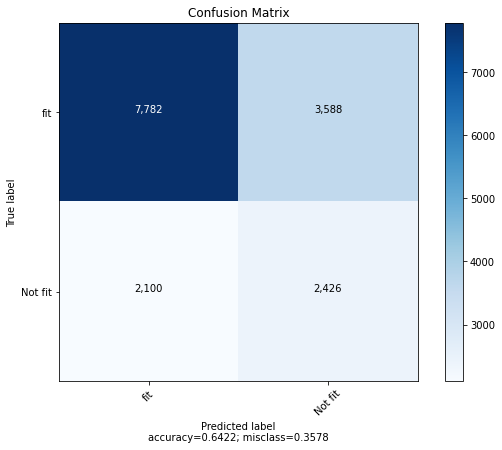

In [266]:
plot_confusion_matrix(cm=confusion, target_names = ['fit', 'Not fit'], title = 'Confusion Matrix',normalize=False)


In [267]:
#predicting the first 30 values
probs = lr1.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.40122598 0.40877563 0.36643141 0.58917238 0.71817856 0.43212752
 0.42954796 0.59039153 0.4064007  0.38963071 0.42336401 0.39916631
 0.41442815 0.74411989 0.56701423 0.40884563 0.41996557 0.41918011
 0.57542088 0.40670007 0.581096   0.38978734 0.42956521 0.5835792
 0.39810728 0.73876548 0.5877838  0.41029543 0.3973347 ]


In [268]:
# building an roc graph
fpr, tpr, thresholds = roc_curve(y_test, probs)

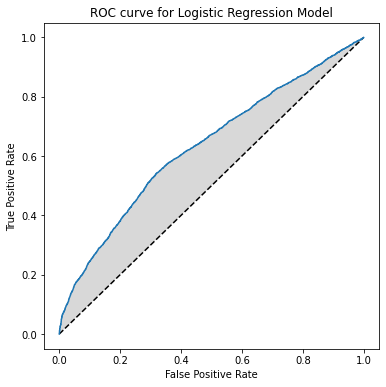

In [269]:
#ROC graph
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [270]:
# ROC accuracy score
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.633


## Random Forest Model and Metrics

In [271]:
#building RF model/Cross Validation/Score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8)

rf_cv_scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5)
print(rf_cv_scores)
print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('\n')
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

rf_clf.fit(X_train_res, y_train_res)

print(f'train score: {rf_clf.score(X_train_res, y_train_res)}')
print(f'test score: {rf_clf.score(X_test, y_test)}')

[0.60972931 0.60550156 0.71853723 0.72584011 0.71458379]
Accuracy scores for the 5 folds:  [0.60972931 0.60550156 0.71853723 0.72584011 0.71458379]


Mean cross validation score: 0.675
train score: 0.6812940633853858
test score: 0.6529944640161047


In [272]:
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[8165 3205]
 [2311 2215]]


In [273]:
#RF Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

report = classification_report(y_test, predictions, target_names=['fit', 'not fit'])
print(report)

[[8165 3205]
 [2311 2215]]
              precision    recall  f1-score   support

         fit       0.78      0.72      0.75     11370
     not fit       0.41      0.49      0.45      4526

    accuracy                           0.65     15896
   macro avg       0.59      0.60      0.60     15896
weighted avg       0.67      0.65      0.66     15896



Using SMOTE with Random Forest produced some overfitting. The accuracy score is higher in Random Forest, but the other metrics are similar to that of Logistic Regression. 

In [274]:
#building RF model/Cross Validation/Score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8)

rf_cv_scores = cross_val_score(rf_clf, X_train_miss, y_train_miss, cv=5)
print(rf_cv_scores)
print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('\n')
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

rf_clf.fit(X_train_miss, y_train_miss)

print(f'train score: {rf_clf.score(X_train_miss, y_train_miss)}')
print(f'test score: {rf_clf.score(X_test, y_test)}')

[0.7232687  0.71551247 0.68698061 0.64695291 0.63545706]
Accuracy scores for the 5 folds:  [0.7232687  0.71551247 0.68698061 0.64695291 0.63545706]


Mean cross validation score: 0.682
train score: 0.7001662049861496
test score: 0.5512707599396075


In [275]:
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[6256 5114]
 [2019 2507]]


In [276]:
#RF Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

report = classification_report(y_test, predictions, target_names=['fit', 'not fit'])
print(report)

[[6256 5114]
 [2019 2507]]
              precision    recall  f1-score   support

         fit       0.76      0.55      0.64     11370
     not fit       0.33      0.55      0.41      4526

    accuracy                           0.55     15896
   macro avg       0.54      0.55      0.52     15896
weighted avg       0.63      0.55      0.57     15896



Using Nearest Miss with Random Forest also produced overfitting, however, this is much larger than with SMOTE

## KNN Model and Metrics

In [277]:
#building KNN model/Cross Validation/Score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Build the model
knn = KNeighborsClassifier(n_neighbors=18)
knn_cv_scores = cross_val_score(knn, X_train_res, y_train_res, cv=5)
print(knn_cv_scores)
knn.fit(X_train_res, y_train_res)

#KNN Score
print(knn.score(X_train_res, y_train_res.ravel()))
print(knn.score(X_test, y_test))


[0.61181574 0.61417669 0.64671645 0.65281133 0.64880299]
0.690815049087435
0.6041771514846502


In [278]:
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)


[[7450 3920]
 [2372 2154]]


In [279]:

report = classification_report(y_test, predictions, target_names=['fit', 'not fit'])
print(report)

              precision    recall  f1-score   support

         fit       0.76      0.66      0.70     11370
     not fit       0.35      0.48      0.41      4526

    accuracy                           0.60     15896
   macro avg       0.56      0.57      0.55     15896
weighted avg       0.64      0.60      0.62     15896



The KNN model converges with 18 nearest neighbors. The overfit is larger with smote than without it.

In [280]:
#building KNN model/Cross Validation/Score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Build the model
knn = KNeighborsClassifier(n_neighbors=18)
knn_cv_scores = cross_val_score(knn, X_train_miss, y_train_miss, cv=5)
print(knn_cv_scores)
knn.fit(X_train_miss, y_train_miss)

print(knn.score(X_train_miss, y_train_miss.ravel()))
print(knn.score(X_test, y_test))

[0.67022161 0.66717452 0.67576177 0.63961219 0.63033241]
0.7109972299168975
0.5478107700050328


In [281]:
# KNN Confusion Matrix

from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)


[[6401 4969]
 [2219 2307]]


In [282]:
# Classification Report for KNN

report = classification_report(y_test, predictions, target_names=['fit', 'not fit'])
print(report)

              precision    recall  f1-score   support

         fit       0.74      0.56      0.64     11370
     not fit       0.32      0.51      0.39      4526

    accuracy                           0.55     15896
   macro avg       0.53      0.54      0.52     15896
weighted avg       0.62      0.55      0.57     15896



The KNN model converges with 18 nearest neighbors as well. Similar with SMOTE, the near miss technique produced high overfitting

KNN is not the best model to use for this dataset because of its high overfitting and lower scores compared to other models

### Summary:

This is an extension to my previous notebook which you can find in the same github folder. 

The goal of this extension was to explore methods to overcome imbalance classes. The techniques I employed were SMOTE and Near Miss. I utilized both of these techniques to compare my scores with different models.

Overall, SMOTE performed best in all three models (logistic regression, random forest, knn). SMOTE increased the scores for the minority class though decreased slightly for the majority class.

Logistic Regression was my main model. Originally, it produced the best results with no overfitting or underfitting. However, using SMOTE, underfitting increased because the minority class is now better represented. 

I also ran the Random Forest and KNN models. For my Random Forest, SMOTE performed better than the Nearest Miss but still produced slightly high overfitting. The accuracy was higher than that of the Logistic Regression but since I am focusing on other metrics (precision, recall, and f1), it didn't performer better or worse than the Logistic Regression model. Similarly for the KNN model, SMOTE performed better. However, KNN was the worst model overall because its high overfitting in both SMOTE and Near Miss plus the low metric scores.

Logistic Regression is the best model to predict whether a dress will fit or not. The model without SMOTE performed better for the fit class but not so well for the minority class. With SMOTE, the minority class is better represented.  